### CIS 9 - Lab 3a

Supervised Learning: Regression and Classification

In [6]:
# Name: Nitya Kashyap

There are 2 parts to this lab, each part works with a different input file and solves a different type of ML problem. 

In [7]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model as lm
from sklearn.tree import DecisionTreeRegressor

#### Part 1

You're asked by a bank to create and train an ML model to predict whether a customer will accept an offer for a new credit card from the bank.

One of the primary ways that a bank makes money is through interest from credit card accounts, so the bank would like to know which customers would be more likely to accept a credit card offer, given their banking status.

The input fle is `cc.csv` ([source](https://www.kaggle.com/datasets/thedevastator/unlocking-credit-card-offer-acceptance-trends-in?select=creditcardmarketing-bbm.csv))

1. Read and inspect data

1a. __Read data from `cc.csv` into a DataFrame__.<br>
Then __print the number of rows and columns of the DataFrame__<br>
and __print the first 5 rows__.<br>

In [8]:
cc = pd.read_csv("cc.csv")
print("rows, columns:", cc.shape)
print("first 5 rows:")
cc.head()

rows, columns: (18000, 18)
first 5 rows:


,index,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


1b. The `Offer Accepted` value of 'Yes' is of interest to the bank.<br> 
__Show the number of 'Yes' and 'No' in the `Offer Accepted` column__.

In [9]:
print(cc["Offer Accepted"].value_counts())

No     16977
Yes     1023
Name: Offer Accepted, dtype: int64


2. Data Cleaning

2a. __Show the number of NaNs__ in each column, and __drop any rows with NaN__.<br>
Then __print the number of rows and columns of the DataFrame__ to confirm that there are still a majority of data available.

In [10]:
print("check for NaNs:")
print(cc.isna().sum())
cc = cc.dropna()
print("\ncleaned data rows, columns:", cc.shape)

check for NaNs:
index                    0
Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

cleaned data rows, columns: (17976, 18)


2b. It looks like the `Average Balance` column is the average of the `Q1, Q2, Q3, Q4 Balances`.<br>
Write code to __confirm that the `Average Balance` is the same as the average of the last 4 balance columns__.

_You should not have to use a loop to check. Instead, think of how pandas (numpy) checks for the count of boolean results_.

In [11]:
# create view of just Q1-4 balances, find the mean of those (across the rows, hence axis=1)
balances = cc.loc[:, ["Q1 Balance", "Q2 Balance", "Q3 Balance", "Q4 Balance"]]
print(f"There are {cc[balances.mean(axis=1) != cc['Average Balance']].shape[0]} number of rows in which Average Balance does not match the average of the last 4 balance columns")

There are 0 number of rows in which Average Balance does not match the average of the last 4 balance columns


2c. Since the `Average Balance` is representative of the 4 quarter balances, __remove the `Q1, Q2, Q3, Q4 Balances`__.<br>
Also __remove any additional columns that will not be helpful to the ML model__.<br>
Then __print the first 5 rows of the DataFrame__.

In [12]:
cc.dtypes
cc["Q1 Balance"]
cc.drop(columns=["Q1 Balance", "Q2 Balance", "Q3 Balance", "Q4 Balance", "Customer Number", "index"], inplace=True)
cc.head()

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00


2d. Create a Raw NBConvert cell to __explain why you removed the additional columns__ of step 2c.

3. Data Preparation

3a. __Change all the "Yes" strings to the number 1, and all the "No" strings to the number 0__ in the DataFrame.

In [13]:
yn = {"Yes":1, "No":0}
cc.replace(yn,inplace=True)
cc.head()

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance
0,0,Air Miles,Letter,High,1,0,High,2,1,4,0,1160.75
1,0,Air Miles,Letter,Medium,1,0,Medium,2,2,5,1,147.25
2,0,Air Miles,Postcard,High,2,0,Medium,2,1,2,1,276.50
3,0,Air Miles,Letter,Medium,2,0,High,1,1,4,0,1219.00
4,0,Air Miles,Letter,Medium,1,0,Medium,2,1,6,1,1211.00


3b. __Print all the unique values of `Income Level` and of `Credit Rating`__ to confirm that both columns use the 3 values: Low, Medium, High.<br>
Then __change "Low" to 0, "Medium" to 1, and "High" to 2__ in the DataFrame<br>
and __print the first 5 rows__ to check your result.

In [14]:
print(f"Unique Income Level values: {', '.join(set(cc['Income Level']))}")
print(f"Unique Credit Rating values: {', '.join(set(cc['Credit Rating']))}")
lmh = {"Low":0, "Medium":1, "High":2}
cc.replace(lmh,inplace=True)
cc.head()

Unique Income Level values: High, Low, Medium
Unique Credit Rating values: High, Low, Medium


,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance
0,0,Air Miles,Letter,2,1,0,2,2,1,4,0,1160.75
1,0,Air Miles,Letter,1,1,0,1,2,2,5,1,147.25
2,0,Air Miles,Postcard,2,2,0,1,2,1,2,1,276.50
3,0,Air Miles,Letter,1,2,0,2,1,1,4,0,1219.00
4,0,Air Miles,Letter,1,1,0,1,2,1,6,1,1211.00


3c. __Change values of `Reward` and `Mailer Type` to numbers__<br>
then __print the first 5 rows of the DataFrame__.

In [15]:
print(f"Unique Reward values: {', '.join(set(cc['Reward']))}")
print(f"Unique Mailer Type values: {', '.join(set(cc['Mailer Type']))}")
rewards = {"Points":1, "Air Miles":2, "Cash Back":3}
mailertypes = {"Postcard":1, "Letter":2}
cc.replace(rewards,inplace=True)
cc.replace(mailertypes,inplace=True)
cc.head()

Unique Reward values: Cash Back, Points, Air Miles
Unique Mailer Type values: Postcard, Letter


,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance
0,0,2,2,2,1,0,2,2,1,4,0,1160.75
1,0,2,2,1,1,0,1,2,2,5,1,147.25
2,0,2,1,2,2,0,1,2,1,2,1,276.50
3,0,2,2,1,2,0,2,1,1,4,0,1219.00
4,0,2,2,1,1,0,1,2,1,6,1,1211.00


3d. __Print the data type of each column__ to confirm that each of the values in the DataFrame is a number.

In [16]:
print("data types:\n", cc.dtypes)

data types:
 Offer Accepted            int64
Reward                    int64
Mailer Type               int64
Income Level              int64
# Bank Accounts Open      int64
Overdraft Protection      int64
Credit Rating             int64
# Credit Cards Held       int64
# Homes Owned             int64
Household Size            int64
Own Your Home             int64
Average Balance         float64
dtype: object


4. Data Analysis

4a. Create a plot with 12 subplots to __show the distribution of each feature__ (column).<br>
The plot should be 2 rows of 6 subplots each, and each subplot should have a title to specify which distribution is shown.

_You should use a loop to create the 12 subplots, don't copy-paste code 12 times_

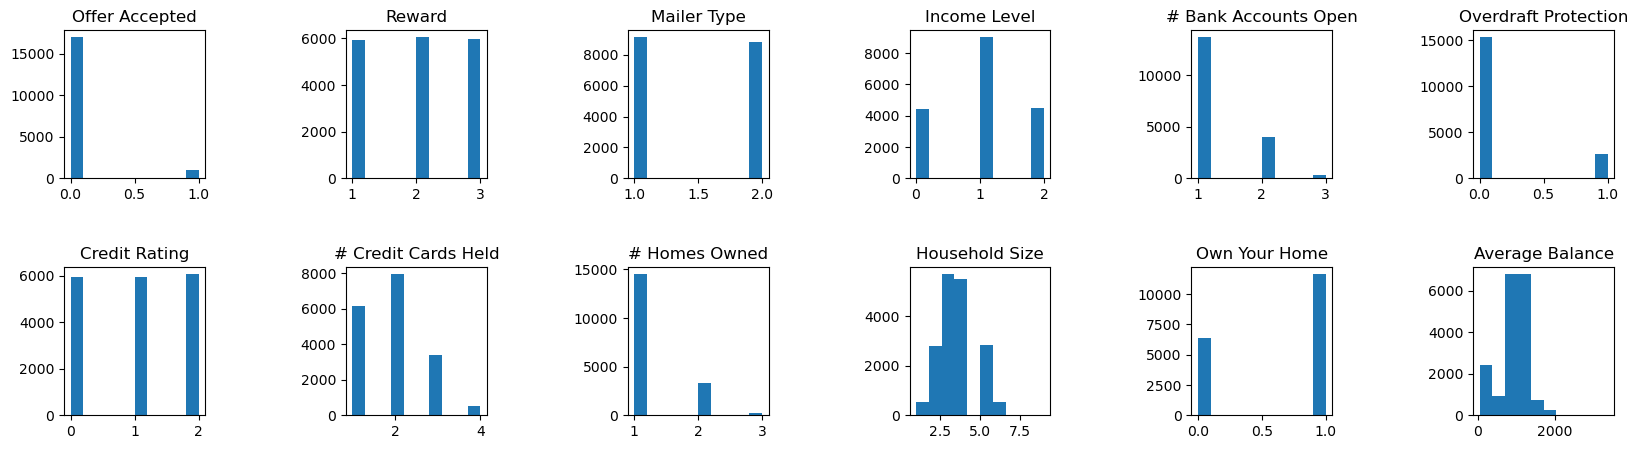

In [17]:
# print(cc.columns)
plt.figure(figsize=(20,5))
i = 1
for col in cc.columns:
    plt.subplot(2, 6, i)
    plt.title(col)
    plt.hist(cc[col])
    plt.plot()
    i += 1
plt.subplots_adjust(hspace=0.6,wspace=1)
# plt.plot()

4c. Create a Raw NBConvert cell to __explain whether there are outliers or anything unusual__ in any of the features.

5. Create training and testing datasets

5a. __Create the X and y datasets__<br>
and __show the number of rows and columns of each dataset__.

In [18]:
X = cc.drop(columns=["Offer Accepted"])
y = cc["Offer Accepted"]
y

0        0
1        0
2        0
3        0
4        0
        ..
17995    0
17996    0
17997    0
17998    0
17999    0
Name: Offer Accepted, Length: 17976, dtype: int64

5b. __Create the training and testing sets__ and __show their dimensions__.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("X train, X test, y train, y test:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X train, X test, y train, y test: (12583, 11) (5393, 11) (12583,) (5393,)


6. Train and measure the accuracy of appropriate ML models. <br>

__Create, train, test, and evaluate the accuracy of _all_ the appropriate machine learning models__ that we've discussed in class to predict the customer response.<br>

- It's a good idea to create one or more Code cells for _each_ type of machine learning model.<br>
(Don't have one huge Code cell that has all the models, it makes debugging more difficult)
- For each model, make sure to show all the accuracy measurements that we've discussed in class for the model.<br>
_(Hint: there is more than one measurement)_

In [20]:
# decision tree classifier
# train
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
# test
y_pred = dtc.predict(X_test)
# evaluate (accuracy score, f1 score confusion matrix)
print("Decision Tree Classifier performance metrics:")
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))

Decision Tree Classifier performance metrics:
Accuracy score: 0.8880029668088263
F1 score: 0.8949152265802675
Confusion Matrix:
 [[4758  346]
 [ 258   31]]


In [21]:
# random forest classifier
# train
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)
# test
y_pred = rfc.predict(X_test)
# evaluate (accuracy score, f1 score confusion matrix)
print("Random Forest Classifier performance metrics:")
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))

Random Forest Classifier performance metrics:
Accuracy score: 0.9388095679584647
F1 score: 0.9180899932720666
Confusion Matrix:
 [[5058   46]
 [ 284    5]]


In [22]:
# KNeighborsClassifier classifier
# train
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)
# test
y_pred = knn.predict(X_test)
# evaluate (accuracy score, f1 score confusion matrix)
print("K-Neighbors Classifier performance metrics:")
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))

K-Neighbors Classifier performance metrics:
Accuracy score: 0.9441869089560542
F1 score: 0.9195912570963991
Confusion Matrix:
 [[5091   13]
 [ 288    1]]


In [23]:
# Gausian Naive Bayes classifier
# train
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
# test
y_pred = gnb.predict(X_test)
# evaluate (accuracy score, f1 score confusion matrix)
print("Gausian Naive Bayes Classifier performance metrics:")
print("Accuracy score:", metrics.accuracy_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))

Gausian Naive Bayes Classifier performance metrics:
Accuracy score: 0.9464120155757464
F1 score: 0.9203557068683642
Confusion Matrix:
 [[5104    0]
 [ 289    0]]


7. Based on the accuracy measurements, what would you recommend to the bank?<br>
Create a Raw NBConvert to show your recommendation.

---

#### Part 2

Create and train an ML model to predict the price of a house, given some common features of the house.<br>
The input file is `house.csv` ([source](https://www.kaggle.com/datasets/praveenobulreddy/usa-housing-dataset)).

1. Read and inspect data

1a. __Read data from `house.csv` into a DataFrame__.<br>
Then __print the number of rows and columns of the DataFrame__<br>
and __print the first 5 rows__.

In [24]:
hp = pd.read_csv("house.csv")
print("Number of rows, columns: ", hp.shape)
hp.head(5)

Number of rows, columns:  (5000, 7)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


1b. __Remove any unnecessary columns__.

In [25]:
hp.drop('Address', axis=1, inplace=True)
hp.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


1c. __Check for NaNs and drop rows with NaNs__.

In [26]:
if(hp.isna().values.any()):
    print ('There are NaNs in the data')
    hp.dropna(axis=0, how='any', inplace=True)
else:
    print ('There is no NaN in the data')

There is no NaN in the data


2. Data Cleaning

__Shorten the column headers to the last word__ only.<br>
For example, "Avg. Area Income" becomes "Income"<br>
Then __show the first 5 rows of the DataFrame__.

In [27]:
hp.columns = hp.columns.str.extract('([a-zA-Z]+)$', expand=False)
hp.head(5)

,Income,Age,Rooms,Bedrooms,Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


3. Data Analysis

3a. __Plot the distribution of the Price__ column<br>
The plot should have a title.

[]

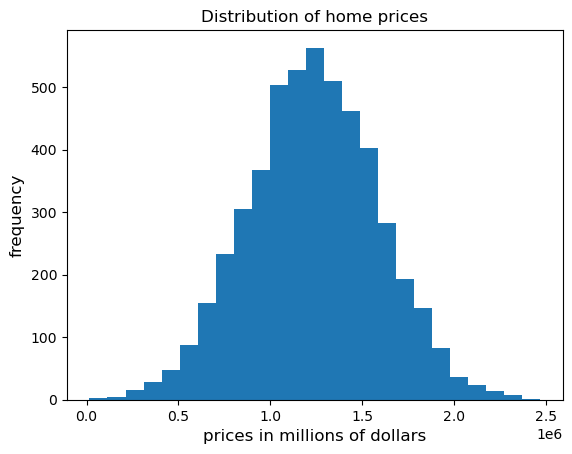

In [28]:
plt.title("Distribution of home prices")
plt.xlabel("prices in millions of dollars",fontsize=12)
plt.ylabel("frequency",fontsize=12)
plt.hist(hp.Price, bins=25)
plt.plot()

3b. Create a Raw NBConvert cell to __explain whether the data is balanced__, based on the plot.

3c. Create a plot with 5 subplots to __show any correlation between each feature and the price__.<br>
The plot should be in 2 rows of 2-3 subplots each, and each subplot should have a title to specify which distribution is shown.

_You should use a loop to create the subplots._

[]

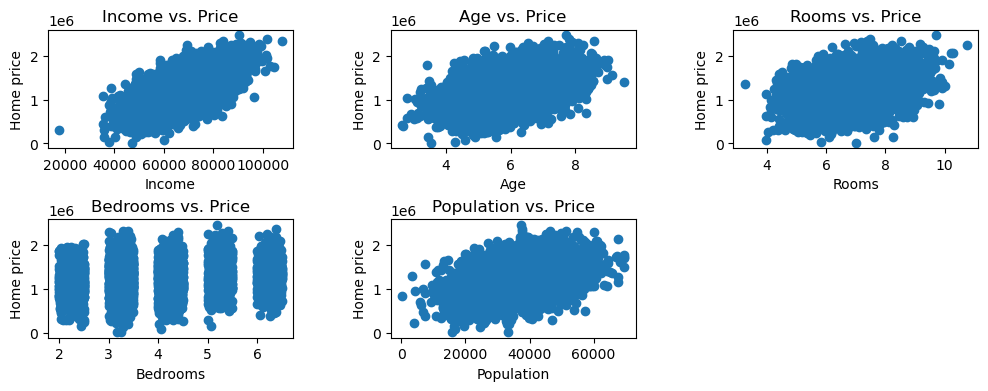

In [29]:
fig = plt.figure(figsize=(12,4))
for i, col in enumerate(hp.columns):
    if(col!='Price'):
        plt.subplot(2,3,i+1)
        plt.title(col+' vs. '+'Price')
        plt.scatter(hp[col],hp.Price)
        plt.xlabel(col)
        plt.ylabel('Home price')
plt.subplots_adjust(hspace=0.6,wspace=0.4)
plt.plot()

3d. Is there any correlation between the features and the price?<br>
Create a Raw NBConvert to __explain any correlation__.

4.Create training and testing datasets

4a. __Create the X and y datasets__<br>
and __show the number of rows and columns of each dataset__.

In [30]:
X = hp[['Income','Age', 'Rooms', 'Bedrooms', 'Population']]
y = hp.Price
print("X and y datasets (rows, columns):", X.shape, y.shape)

X and y datasets (rows, columns): (5000, 5) (5000,)


4b. __Create the training and testing sets__ and __show their dimensions__.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("X train, test, y train, test:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X train, test, y train, test: (3500, 5) (3500,) (1500, 5) (1500,)


5. Train and measure accuracy of appropriate ML models. <br>

__Create, train, test, and evaluate the accuracy of _all_ the appropriate machine learning models__ that we've discussed in class to predict the customer response.<br>

- It's a good idea to create one or more Code cells for _each_ type of machine learning model.<br>
(Don't have one huge Code cell that has all the models, it makes debugging more difficult)
- For each model, make sure to show all the accuracy measurements that we've discussed in class for the model.<br>
_(Hint: there is more than one measurement)_

In [32]:
regr = lm.LinearRegression()
regr = regr.fit(X_train, y_train)
coeff = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])
print("Linear Regression:")
coeff

Linear Regression:


,Coefficient
Income,21.625803
Age,166032.076525
Rooms,121706.598731
Bedrooms,904.712865
Population,15.149329


In [33]:
y_pred = regr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
priceMean = np.mean(y)
print('Root Mean Squared Error:',round(RMSE,2),"or",round(RMSE/priceMean*100),"percent error")
print('R^2 value:', round(regr.score(X,y),2))

Root Mean Squared Error: 102552.81 or 8 percent error
R^2 value: 0.92


In [34]:
regr = DecisionTreeRegressor()
regr = regr.fit(X_train, y_train)
# from sklearn import tree
# matplotlib.rcParams['figure.figsize'] = (10, 8)
# tree.plot_tree(regr, fontsize=10)
# plt.show()

In [35]:
y_pred = regr.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.shape)
df

(1500, 2)


,Actual,Predicted
3892,1.033626e+06,8.723122e+05
3904,6.944721e+05,7.172732e+05
4671,8.658167e+05,1.017105e+06
2083,1.080171e+06,1.170574e+06
1969,1.387988e+06,1.228880e+06
...,...,...
4716,1.267987e+06,5.094996e+05
4212,1.151129e+06,1.275497e+06
4526,1.074647e+06,1.533816e+06
4656,1.592176e+06,1.560870e+06


In [36]:
features = pd.DataFrame(regr.feature_importances_, X.columns, columns=['Importance'])
features

,Importance
Income,0.435444
Age,0.234135
Rooms,0.131341
Bedrooms,0.016496
Population,0.182584


6. For the models that you used, do they have the same list of important features?
Create a Raw NBConvert cell to __compare the lists of important features__.